In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def load_constrained_data(dim=1, case=1, ns=4, metric=0):
    """
    dim: 1 or 2
    case: 1, 2 or 3
    ns: number of virtual points(s). 4, 8, 16, 32, 64 or 128.
    metric: 0: mse, 1: ci, 2: iac, 3:ees/s
    """
    folder = "hpc_output/"
    file_path = folder + f"{dim}d_{case}_{ns}/info.txt"
    # print(file_path)
    data = np.loadtxt(file_path, skiprows=3, delimiter=" ")
    return data[:,metric]

In [3]:
def load_unconstrained_data(dim=1, case=1, ns=4, metric=0):
    """
    dim: 1 or 2
    case: 1, 2 or 3
    ns: number of virtual points(s). 4, 8, 16, 32, 64 or 128. Doesn't matter
    metric: 0: mse, 1: ci
    """
    folder = "hpc_output/"
    file_path = folder + f"{dim}d_{case}_{ns}/info.txt"
    # print(file_path)
    data = np.loadtxt(file_path, skiprows=2, delimiter=" ", usecols=(0, 1))
    return data[0,metric]

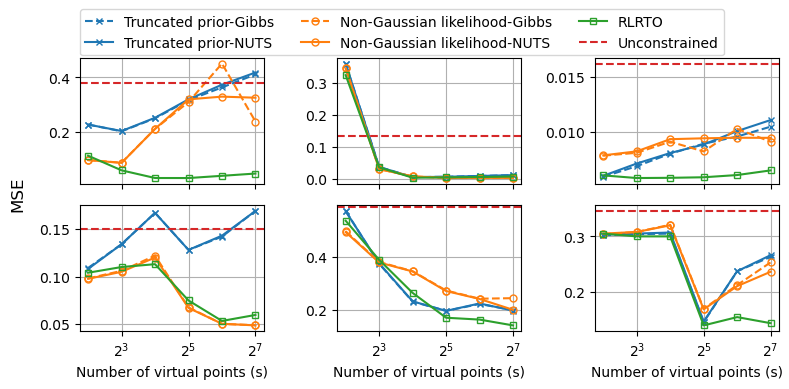

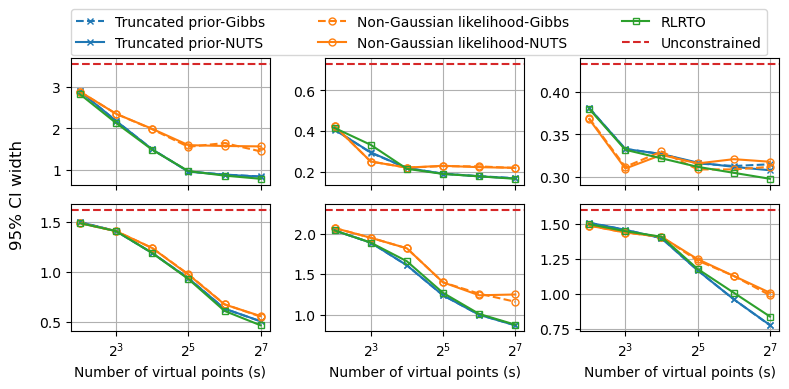

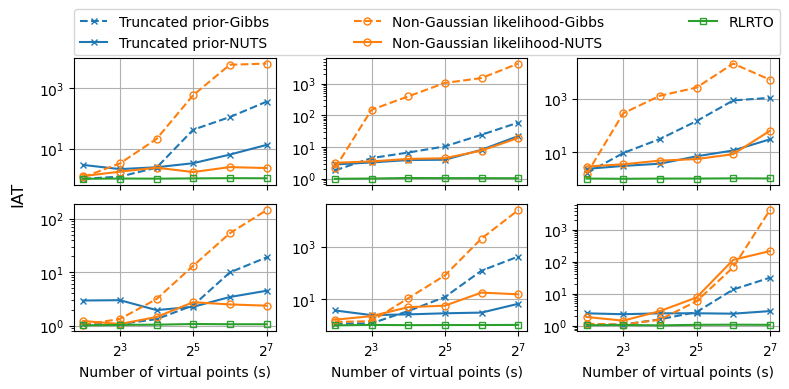

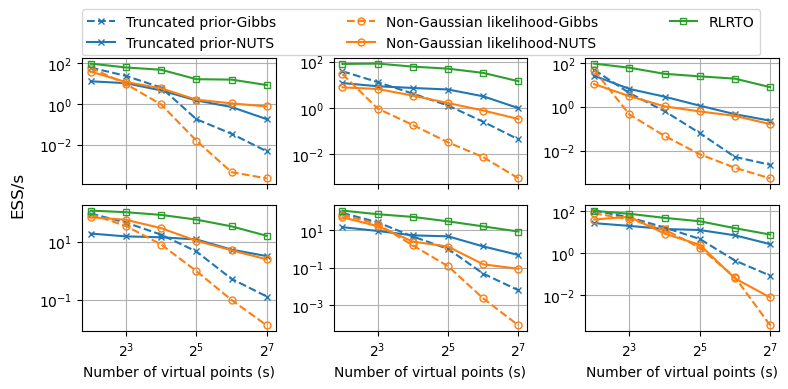

In [4]:
# methods = ['Truncated-Gibbs', 'Truncated-NUTS', 'Nonlinear-Gibbs', 'Nonlinear-NUTS', 'RTO']
methods = ['Truncated prior-Gibbs', 'Truncated prior-NUTS', 'Non-Gaussian likelihood-Gibbs', 'Non-Gaussian likelihood-NUTS', 'RLRTO']
import matplotlib as mpl
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]
line_colors = [cols[0], cols[0], cols[1], cols[1], cols[2]]
line_styles = ["dashed","solid","dashed","solid","solid"]
markers = ["x", "x", "o", "o", "s"]
fig_size = (8, 4)

dims = [1, 2]
cases = [1, 2, 3]
nss = [4, 8, 16, 32, 64, 128]
metrics = ["MSE", "95% CI width", "IAT", "ESS/s"]
metrics_filenames = ["MSE", "CI_width", "IACT", "ESS_s"]
for metric_index in range(len(metrics)):
    fig, axs = plt.subplots(len(dims), len(cases), figsize=fig_size, sharex=True)
    for dim in dims:
        for case in cases:
            data_metrics = np.asarray([load_constrained_data(dim,case,i,metric_index) for i in nss])
            ax = axs[dim-1, case-1]

            for i in range(data_metrics.shape[1]):
                ax.plot(nss, data_metrics[:,i], label=methods[i], color=line_colors[i], ls=line_styles[i], markersize=5, marker=markers[i], fillstyle='none')
                ax.set_xscale("log", base=2)
                if metric_index == 2 or metric_index == 3:
                    ax.set_yscale("log")
            if metric_index == 0 or metric_index == 1:
                unconstrained_data_metrics = load_unconstrained_data(dim, case, 4, metric_index)
                #add horizontal line
                ax.axhline(unconstrained_data_metrics, color=cols[3], linestyle='--', label="Unconstrained")
            if dim == 2:
                ax.set_xlabel("Number of virtual points (s)")
            # ax.set_ylabel(metrics[metric_index])
            ax.grid()
            if ax == axs[0, 0]:
                # ax.legend(bbox_to_anchor=(0., 1.02, 2.2, .102), loc=3, ncol=3, mode="expand", borderaxespad=0)
                # ax.legend(bbox_to_anchor=(0., 1.02, 2.6, .102), loc='lower left', ncols=3, mode="expand", borderaxespad=0.)
                ax.legend(bbox_to_anchor=(0., 1.02, 3.5, .02), loc='lower left', ncols=3, mode="expand", borderaxespad=0.)
    fig.supylabel(metrics[metric_index])
    plt.tight_layout()
    plt.savefig(f"{metrics_filenames[metric_index]}.pdf", bbox_inches='tight')
    

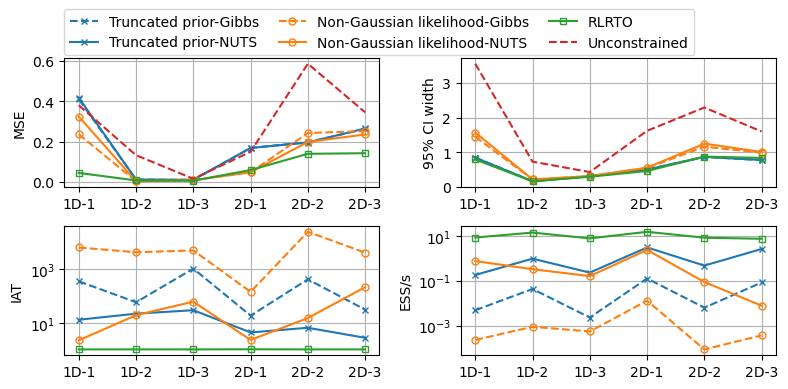

In [5]:
metrics = ["MSE", "95% CI width", "IAT", "ESS/s"]
metric_names = ["MSE", "CI_width", "IACT", "ESS_s"]
case_names = ["1D-1", "1D-2", "1D-3", "2D-1", "2D-2", "2D-3"]

methods = ['Truncated prior-Gibbs', 'Truncated prior-NUTS', 'Non-Gaussian likelihood-Gibbs', 'Non-Gaussian likelihood-NUTS', 'RLRTO', 'Unconstrained']

fig_size = (8, 4)

fig, axs = plt.subplots(2, 2, figsize=fig_size)

for i, metric_name in enumerate(metric_names):
    file_name = f"hpc_output/{metric_name}_128.txt"
    data = np.loadtxt(file_name, delimiter=" ")
    ax = axs[int(i/2), i %2]
    ax.set_ylabel(metrics[i])
    if metric_name == "MSE" or metric_name == "CI_width":
        for j in range(5):
            ax.plot(data[j+1,:], label=methods[j], color=line_colors[j], ls=line_styles[j], markersize=5, marker=markers[j], fillstyle='none')
        ax.plot(data[0,:], color=cols[3], linestyle='--', label=methods[-1])
    elif metric_name == "IACT" or metric_name == "ESS_s":
            for j in range(5):
                ax.plot(data[j,:], label=methods[j], color=line_colors[j], ls=line_styles[j], markersize=5, marker=markers[j], fillstyle='none')
            ax.set_yscale("log")
    ax.grid()
    # axs[i].set_ylabel("MSE")
    ax.set_xticks(np.arange(6), labels=case_names)
    if i == 0:
        # ax.legend(bbox_to_anchor=(0., 1.02, 1.66, .02), loc='lower left', ncols=3, mode="expand", borderaxespad=0.)
        ax.legend(bbox_to_anchor=(0., 1.02, 2.0, .02), loc='lower left', ncols=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.savefig(f"hpc_output/metrics_against_cases.pdf", bbox_inches='tight')